In [60]:
found = np.min(poly)+np.random.rand(3)*(np.max(poly,0)-np.min(poly,0))

In [62]:
step = 0.01
rec = found[None,:].repeat(2,0)
rec[0,:]-=step/2
rec[1,:]+=step/2
recsize = np.ones(rec.shape[1])

In [97]:
import itertools
dims = 3
lst = list(itertools.product([0, 1], repeat=dims-1))
lst = np.array(lst)
d = 1
coords = np.c_[lst[:,0:d],np.ones([len(lst),1]),lst[:,d:]]
inside = True
for ps in rec[coords.astype(int),np.arange(0,dims)]:
    if not test_inside_any_simplex(poly,ps):
        inside = False

True
True
True
True


In [21]:
np.random.rand()

array([0.44700575, 0.96316294, 0.84080382])

In [1]:
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
from scipy.spatial.qhull import QhullError
import numpy as np

def test_inside_simplex(simplex,point):
    try:
        hull = Delaunay(simplex)
        return hull.find_simplex(point)>=0
    except QhullError:
        return False #the triangle's probably just flat
def test_inside_any_simplex(polygon,point):
    """Given a 2d (NxD) array, consisting of vertex locations on each row, and each d+1 rows containing one simplex"""    
    for i in range(0,len(polygon),dims+1):
        #print(polygon[i:i+dims+1,:])
        if test_inside_simplex(polygon[i:i+dims+1,:], point):
            return True
    return False


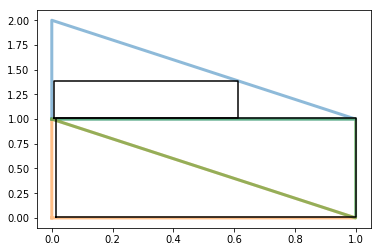

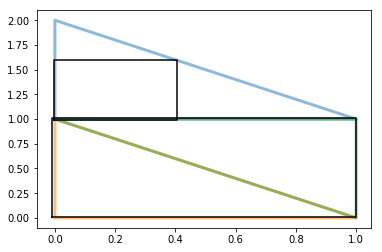

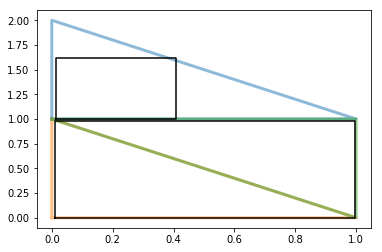

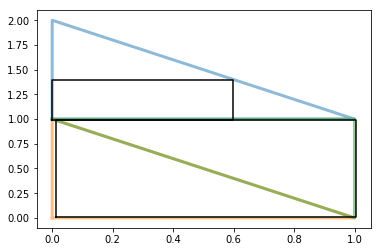

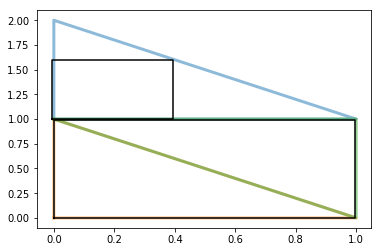

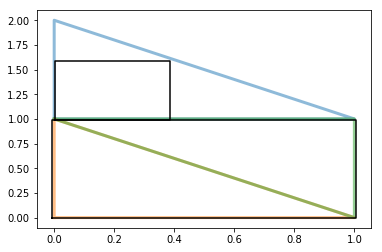

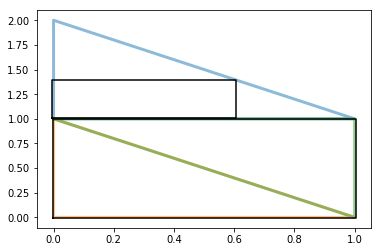

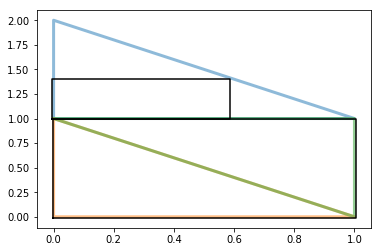

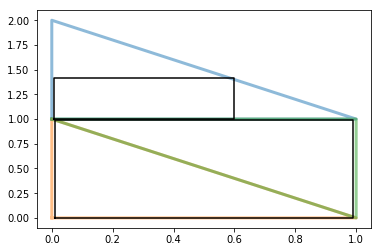

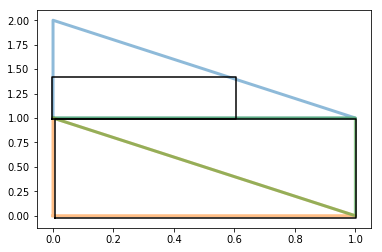

In [14]:

import numpy as np
X = 1.0*np.array([[1,1,-1,-1,-1,-1,-1,1,-1,0,0,0,1,1,-1,-1,-1,-1,1,-1,-1,0,0,0,  
                                 1,1,1,-1,-1,1,-1,1,1,0,0,0,1,1,1,-1,-1,1,1,-1,1,0,0,0,               
                                 1,-1,1,-1,-1,-1,-1,-1,1,0,0,0,1,-1,1,-1,-1,-1,1,-1,-1,0,0,0,  
                                 1,1,1,-1,1,-1,-1,1,1,0,0,0,1,1,1,-1,1,-1,1,1,-1,0,0,0,
                                 -1,1,1,-1,-1,-1,-1,-1,1,0,0,0,-1,1,1,-1,-1,-1,-1,1,-1,0,0,0,  
                                 1,1,1,1,-1,-1,1,-1,1,0,0,0,1,1,1,1,-1,-1,1,1,-1,0,0,0,
                                  
                                  3,1,-1,2,-1,-1,2,1,-1,3,0,0]])

X = 1.0*np.array([[0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,2,1,1]])
dims = 2
import rectangles
polys = rectangles.splitintopolygons(X[0,:],dims)
poly = polys[0]
#test_inside_any_simplex(poly,np.array([1.1,0,0]))
#compute_rectangles(poly,step,dims,Nrecs=1,Ntrials=50,failcountlimit=40)
import matplotlib.pyplot as plt
%matplotlib inline
    
for it in range(10):
    recs = rectangles.compute_rectangles(poly,dims=2,Nrecs=2,step=0.2,Ntrials=15)
    plt.figure()
    for i in range(0,len(poly),3):
        plt.plot(poly[[i,i+1,i+2,i],0],poly[[i,i+1,i+2,i],1],alpha=0.5,lw=3)
    for rec in recs:
        rec+=np.random.randn(rec.shape[0],rec.shape[1])*0.01
        plt.plot([rec[0,0],rec[0,0],rec[1,0],rec[1,0],rec[0,0]],[rec[0,1],rec[1,1],rec[1,1],rec[0,1],rec[0,1]],'k-')

In [1]:
[0,1,2,3,4,5][0:6],[0,1,2,3,4,5][6:]


([0, 1, 2, 3, 4, 5], [])

In [9]:
np.round(np.array([1.2,1.3]))

array([1., 1.])